In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2,1)) # 2 x 1'lik birler matrisi
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2,1)) # 2 x 1'lik sıfırlar matrisi
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.) # ortalaması 0,
# standart sapması 1 olan 3x1 boyutunda rastgele bir tensor (normal distribution)
print(x)

tf.Tensor(
[[-0.31075934]
 [-0.0623241 ]
 [ 0.84930634]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
# 0 ile 1 arasında rastgele bir tensor (uniform distribution)
print(x)

tf.Tensor(
[[0.3207345 ]
 [0.40132582]
 [0.6137203 ]], shape=(3, 1), dtype=float32)


Numpy array'leri değiştirilebilirken tensorflow tensorları değiştirilemezdir.


In [ ]:
import numpy as np
x = np.ones(shape=(2,2))
print(x)
x[0,0] = 0.
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


In [ ]:
x = tf.ones(shape=(2,2))
x[0,0] = 0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

Fakat örneğin modelimizde ağırlıklar (w) gibi değiştirmemiz gereken array'ler
olacak. Bu durumda yapacağımız şey tensorflow'da değişken (Variable) olarak
atamak. Bu o array'in daha sonra değiştirilebileceği anlamına gelir.

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
#initial value: başlangıc değerimiz
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.3990925 ],
       [-0.43444774],
       [-0.529121  ]], dtype=float32)>


In [ ]:
# bu Variable'lar assign ile değiştirilebilir
v.assign(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [ ]:
# direkt olarak değişkenin tamamını değiştirmek yerine belirli indeksi değiştirme
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# assign_add() +=
# assign_sub() -=

v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

# Tensorflow'da matematiksel işlemler: tensor operasyonları

In [ ]:
a = tf.ones((2,2)) #2x2 birler matrisi
print(a)
b = tf.square(a) # her bir elemanın karesi
print(b)
c = tf.sqrt(a) # her bir elemanın karekökü
print(c)
d = b + c
print(d)
e = tf.matmul(a,b) # matris çarpımı
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


# gradienttape

In [ ]:
input_var = tf.Variable(initial_value=3.) # 3 değeri ile başladık
# sonuna nokta koymamızın sebebi veri tipi olarak float istememiz
with tf.GradientTape() as tape:
    result = tf.square(input_var) # 3'ün karesini aldık = 9
gradient = tape.gradient(result, input_var) # 9 ile 3 arasındaki fark = 6
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
# variable gibi değişebilen bir yapı ile değil de constant gibi değişmez
# bir yapı ile çalışalım

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

# yine aynı sonucu veriyor
# fakat constant yapılarda tape.watch() ile izlemek gerekir.
# her veriyi tek tek izlemek yerine, bizim söylediğimizi izledi.

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
# ikinci dereceden türev

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as tape:
        position = 4.9 * time ** 2
    speed = tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)

# burada olan şey şu yolun formülü 4.9 * t ^ 2
# bunun türevi bize hızı verecek = 9.8 * t | t = 0 alırsak da hız = 0
# hızın türevi ivmeyi verir = 9.8 | t'ye bağlı olmadığı, sabit olduğu için 9.8



tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


# lineer sınıflandırıcı yazmak

mean değişkenlerimizin merkezlerini belirliyor.

mean=[0, 3] ifadesi x-ekseninde 0, y-ekseninde 3 merkezli bir veri bulutu oluşturduğumuz anlamına geliyor.

kovaryans ise x ve y'deki verilerin birbirleriyle olan ilişkisini ifade ediyor:

- 0.5 olması (pozitif) aynı anda ikisinin de artması anlamına gelir. Biri artarken diğeri de artar.
- -0.5 olması (negatif) biri artarken diğerinin azaldığı anlamına gelir.
- 0 ise birbirleri arasında bir bağ olmadığı anlamına gelir.

`cov = [[1, 0.5],
       [0.5, 1]]` ifadesi şu anlama gelir:

İki değişken olduğu için 2x2’lik matris kullanılır.

- İlk satır `[1, 0.5]`:
  - 1: x'in varyansı, yani x ortalamadan yaklaşık ±1 birim değişir.
  - 0.5: x ile y arasındaki pozitif ilişki (kovaryans).

- İkinci satır `[0.5, 1]`:
  - 0.5: y ile x arasındaki pozitif ilişki (kovaryans).
  - 1: y'nin varyansı, y ortalamadan yaklaşık ±1 birim değişir.


In [31]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5],
     [0.5, 1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

print(negative_samples.shape)
print(positive_samples.shape)

(1000, 2)
(1000, 2)


In [32]:
# pozitif ve negatifleri tek bir array'de toplayalım
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [33]:
# bunları etiketleyeceğiz, bir hedef oluşturuyoruz.
# pozitif ve negatif olarak ayırmıştık zaten. negatiflere 0, pozitiflere 1
# diyoruz

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

targets.shape

(2000, 1)

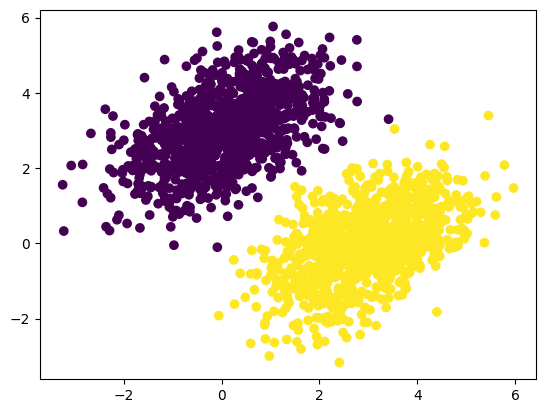

In [34]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [35]:
import tensorflow as tf
# lineer sınıflandırma için gerekli değişkenler: ağırlık ve bias

input_dim = 2 # 2D bir matrisle uğraşıyoruz
output_dim = 1 # noktanın yalnızca 0 ya da 1 olması durumuna bakıyoruz

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
# w için (2,1)'lik rastgele değerler aldırdık
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
# b'ye (1,)'lik sıfır vektörü oluşturduk

print(f"W_shape: {W.shape}")
print(f"b_shape: {b.shape}")

W_shape: (2, 1)
b_shape: (1,)


In [36]:
def model(inputs):
  return tf.matmul(inputs, W) + b

# tahmin = w1 * x + w2 * y + b

In [37]:
# gerçek değer ile tahmin arasındaki farka bakıyoruz: loss function
# kullandığımız yöntem ise Mean Squared Error Loss Function

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  # ismini aldığı gibi farkın karesini alıyoruz
  return tf.reduce_mean(per_sample_losses)
  # reduce_mean detayı aşağıda


**Reduce Mean ne işe yarar**

Tensor'ların (çok boyutlu dizilerin) ortalamasını alıyor.
aşağıdaki örnekler reduce mean'i daha kolay anlamak için yapıldı, kitapta yok

In [38]:
x = tf.constant([[1,2,3],
                 [4,5,6]], dtype=tf.float32)
# veri tipini float32 seçmek önemli yoksa bölme işleminde ondalıklı sayı gelmez.

mean_all = tf.reduce_mean(x)
print(mean_all.numpy())
# tüm sayıların ortalamasını aldık (1+2+3+4+5+6)/6 = 21 / 6 = 3.5

# tüm sayıların değil de belirli bir akis'in ortalamasını almak. axis = 0 -> sütun
mean_axis0 = tf.reduce_mean(x, axis=0)
print(mean_axis0.numpy())
# burada sütunların ayrı ayrı ortalamasını hesaplayacağı için bir array gelecek
# [(1+4 /  2) (2+5 /  2) (3+6 /  2)]
# [2.5  3.5  4.5]

# axis=1 -> satır
mean_axis1 = tf.reduce_mean(x, axis=1)
print(mean_axis1.numpy())
# 2 satır olduğu için iki elemanlı array gelecek
# [(1+2+3 / 3 )   (4+5+6   /  3)]
# [2.  5.]


3.5
[2.5 3.5 4.5]
[2. 5.]


In [39]:
# Artık eğitimdeki adımlara geçiyoruz

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


yukarıdaki kodun açıklaması

`tahmin = W * x + b`

`Loss = (tahmin - gerçek) ^ 2 = (Wx+b-gerçek)^2`

Başlangıçta biz
- `W = 1.0`
- `b = 0.5`
- `girdimiz x = 3.0`
- `gerçek hedefimiz, gerçek = 2.0`
- `learning rate 0.1`

diyelim

Değerleri yerine koyarsak

`tahmin = 1.0 * 3.0 + 0.5 = 3.5`

`loss = (3.5 - 2.0)^2 = 1.5^2 = 2.25`

şimdi loss'un türevlerini alıyoruz.
loss formülümüz:

`loss = (Wx+b-gerçek)^2`

bunun W'ye göre türevi

`2*(Wx+b-t) * x`

değerleri yerine koyarsak

`= 2 * (3.5 - 2.0 * 3.0 = 2 * 1.5 * 3 = 9.0)`

b'ye göre türevi

`2(Wx+b-t) * 1 = 2 * (3.5 - 2.0) * 1 = 3.0`


Artık yeni değerleri güncelleyebiliriz

`W_yeni = W - learning_rate * türev = 1.0 - 0.1 * 9 = 0.1`

`b_yeni = b - learning_rate * türev = 0.5 - 0.1 * 3.0 = 0.2`

In [41]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.4114
Loss at step 1: 0.3772
Loss at step 2: 0.1537
Loss at step 3: 0.1188
Loss at step 4: 0.1078
Loss at step 5: 0.1003
Loss at step 6: 0.0937
Loss at step 7: 0.0877
Loss at step 8: 0.0823
Loss at step 9: 0.0773
Loss at step 10: 0.0727
Loss at step 11: 0.0686
Loss at step 12: 0.0648
Loss at step 13: 0.0613
Loss at step 14: 0.0582
Loss at step 15: 0.0553
Loss at step 16: 0.0526
Loss at step 17: 0.0502
Loss at step 18: 0.0480
Loss at step 19: 0.0460
Loss at step 20: 0.0442
Loss at step 21: 0.0425
Loss at step 22: 0.0410
Loss at step 23: 0.0396
Loss at step 24: 0.0383
Loss at step 25: 0.0371
Loss at step 26: 0.0360
Loss at step 27: 0.0351
Loss at step 28: 0.0342
Loss at step 29: 0.0334
Loss at step 30: 0.0326
Loss at step 31: 0.0319
Loss at step 32: 0.0313
Loss at step 33: 0.0308
Loss at step 34: 0.0302
Loss at step 35: 0.0298
Loss at step 36: 0.0293
Loss at step 37: 0.0289
Loss at step 38: 0.0286
Loss at step 39: 0.0282


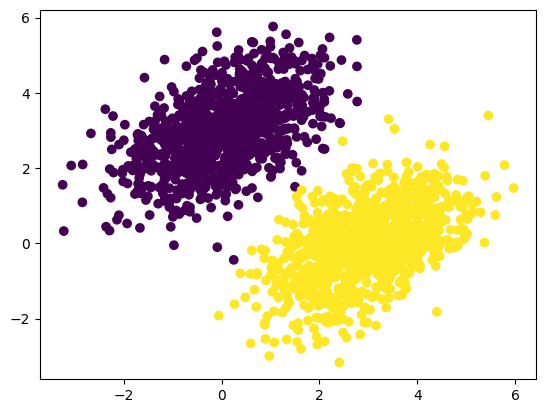

In [42]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

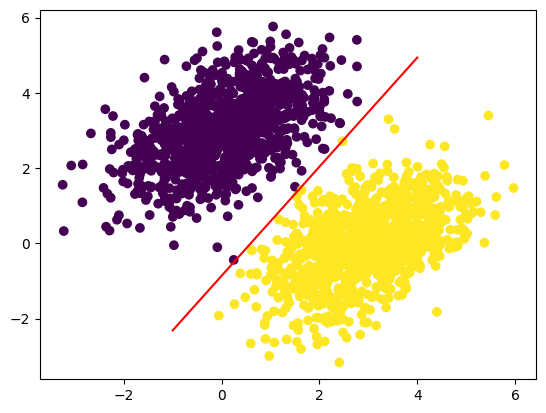

In [45]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, c="r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)